## Read dataset

In [41]:
import pandas as pd

features = pd.read_csv('../data/dataset.csv')
features.shape

(1467832, 63)

## Drop extra columns

In [42]:
features.drop(columns=['target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_sub_ltv_day30'], inplace=True)
features.shape

(1467832, 60)

## Set out target

In [43]:
target = features['target_full_ltv_day30']
target.shape

(1467832,)

In [44]:
features = features.drop(['target_full_ltv_day30'], axis=1)
features.shape

(1467832, 59)

## Feature encoding

In [45]:
features.select_dtypes(include=['object']).columns

Index(['media_source', 'install_date', 'country_code', 'platform'], dtype='object')

### Media source

In [46]:
features['media_source'].value_counts()

SOURCE_4     728958
SOURCE_17    318634
SOURCE_23    238587
SOURCE_2      63236
SOURCE_10     23961
SOURCE_12     23442
SOURCE_1      23391
SOURCE_6      14470
SOURCE_19     10511
SOURCE_5       7564
SOURCE_9       4574
SOURCE_18      3716
SOURCE_16      3354
SOURCE_14      2168
SOURCE_7        866
SOURCE_3        194
SOURCE_15        74
SOURCE_8         46
SOURCE_11        25
SOURCE_22        23
SOURCE_21        21
SOURCE_0         13
SOURCE_20         2
SOURCE_13         2
Name: media_source, dtype: int64

In [47]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()
features['media_source'] = target_encoder.fit_transform(features['media_source'], target)
features['media_source'].head()

d:\repos\TestTask_IASA_DataScience_Champ\venv\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
d:\repos\TestTask_IASA_DataScience_Champ\venv\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0    0.370435
1    0.144547
2    0.558890
3    0.370435
4    0.485264
Name: media_source, dtype: float64

### Install date

In [48]:
features['install_date'].value_counts()

2021-12-30    94101
2021-12-29    73435
2021-12-31    64204
2021-12-21    60170
2021-12-26    59902
              ...  
2021-12-05     6898
2021-12-04     6677
2021-12-03     6268
2021-12-07     6198
2021-12-06     5587
Name: install_date, Length: 62, dtype: int64

In [49]:
features['install_date'] = pd.to_datetime(features['install_date'])
features['install_date'].head()

0   2021-12-03
1   2021-12-03
2   2021-12-03
3   2021-12-03
4   2021-12-03
Name: install_date, dtype: datetime64[ns]

In [50]:
features['install_date_year'] = features['install_date'].dt.year
features['install_date_month'] = features['install_date'].dt.month
features['install_date_day'] = features['install_date'].dt.day
features.drop(columns=['install_date'], inplace=True)

### Country code

In [51]:
features['country_code'].value_counts()

COUNTRY_141    387761
COUNTRY_13     260238
COUNTRY_155    152936
COUNTRY_108    114661
COUNTRY_35     111007
                ...  
COUNTRY_73          1
COUNTRY_10          1
COUNTRY_151         1
COUNTRY_175         1
COUNTRY_37          1
Name: country_code, Length: 224, dtype: int64

In [52]:
features['country_code'] = target_encoder.fit_transform(features['country_code'], target)
features['country_code'].head()

0    0.019025
1    0.606548
2    0.606548
3    0.606548
4    0.092942
Name: country_code, dtype: float64

### Platform

In [53]:
features['platform'].value_counts()

android    887426
ios        580406
Name: platform, dtype: int64

In [54]:
features = pd.get_dummies(features, columns=['platform'])
features[['platform_android', 'platform_ios']].head()

,platform_android,platform_ios
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


## Feature selection

In [55]:
nan_columns = ['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3', 'total_sessions_day7']
features[nan_columns] = features[nan_columns].fillna(features[nan_columns].mean())
features.isnull().sum()

total_sessions_day0       0
total_sessions_day1       0
total_sessions_day3       0
total_sessions_day7       0
chapters_finished_day0    0
                         ..
install_date_year         0
install_date_month        0
install_date_day          0
platform_android          0
platform_ios              0
Length: 62, dtype: int64

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

def select_features(features, target):
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	fs.fit(features, target)
	features = fs.transform(features)
 
	return features, fs

In [58]:
features, fs = select_features(features, target)

In [59]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.118233
Feature 1: 0.145944
Feature 2: 0.166133
Feature 3: 0.180236
Feature 4: 0.258555
Feature 5: 0.285815
Feature 6: 0.312664
Feature 7: 0.331457
Feature 8: 0.249477
Feature 9: 0.277485
Feature 10: 0.302238
Feature 11: 0.322239
Feature 12: 0.060521
Feature 13: 0.080132
Feature 14: 0.094638
Feature 15: 0.107035
Feature 16: 0.376164
Feature 17: 0.409603
Feature 18: 0.435896
Feature 19: 0.454542
Feature 20: 0.331291
Feature 21: 0.365534
Feature 22: 0.389453
Feature 23: 0.406907
Feature 24: 0.240142
Feature 25: 0.266152
Feature 26: 0.287330
Feature 27: 0.305265
Feature 28: 0.080201
Feature 29: 0.052586
Feature 30: 0.037070
Feature 31: 0.124232
Feature 32: 0.252607
Feature 33: 0.332028
Feature 34: 0.118832
Feature 35: 0.244944
Feature 36: 0.322269
Feature 37: 0.017356
Feature 38: 0.048369
Feature 39: 0.090409
Feature 40: 0.161537
Feature 41: 0.316122
Feature 42: 0.412186
Feature 43: 0.116526
Feature 44: 0.232966
Feature 45: 0.305025
Feature 46: 0.006826
Feature 47: 0.007864
Fe

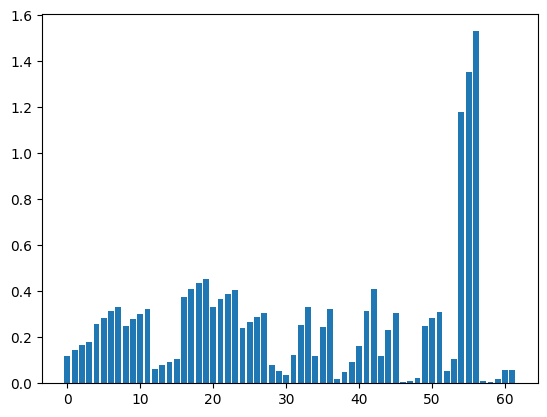

In [60]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [61]:
import numpy as np

np.count_nonzero(fs.scores_[fs.scores_ >= np.mean(fs.scores_)])

27

In [62]:
features.shape

(1467832, 62)

In [63]:
features = features[:, fs.scores_ >= np.mean(fs.scores_)]

In [64]:
features = features.T
features.shape

(27, 1467832)

In [65]:
target = target.to_numpy()
target = target.reshape(-1, 1)
target.shape

(1467832, 1)

## Skewness

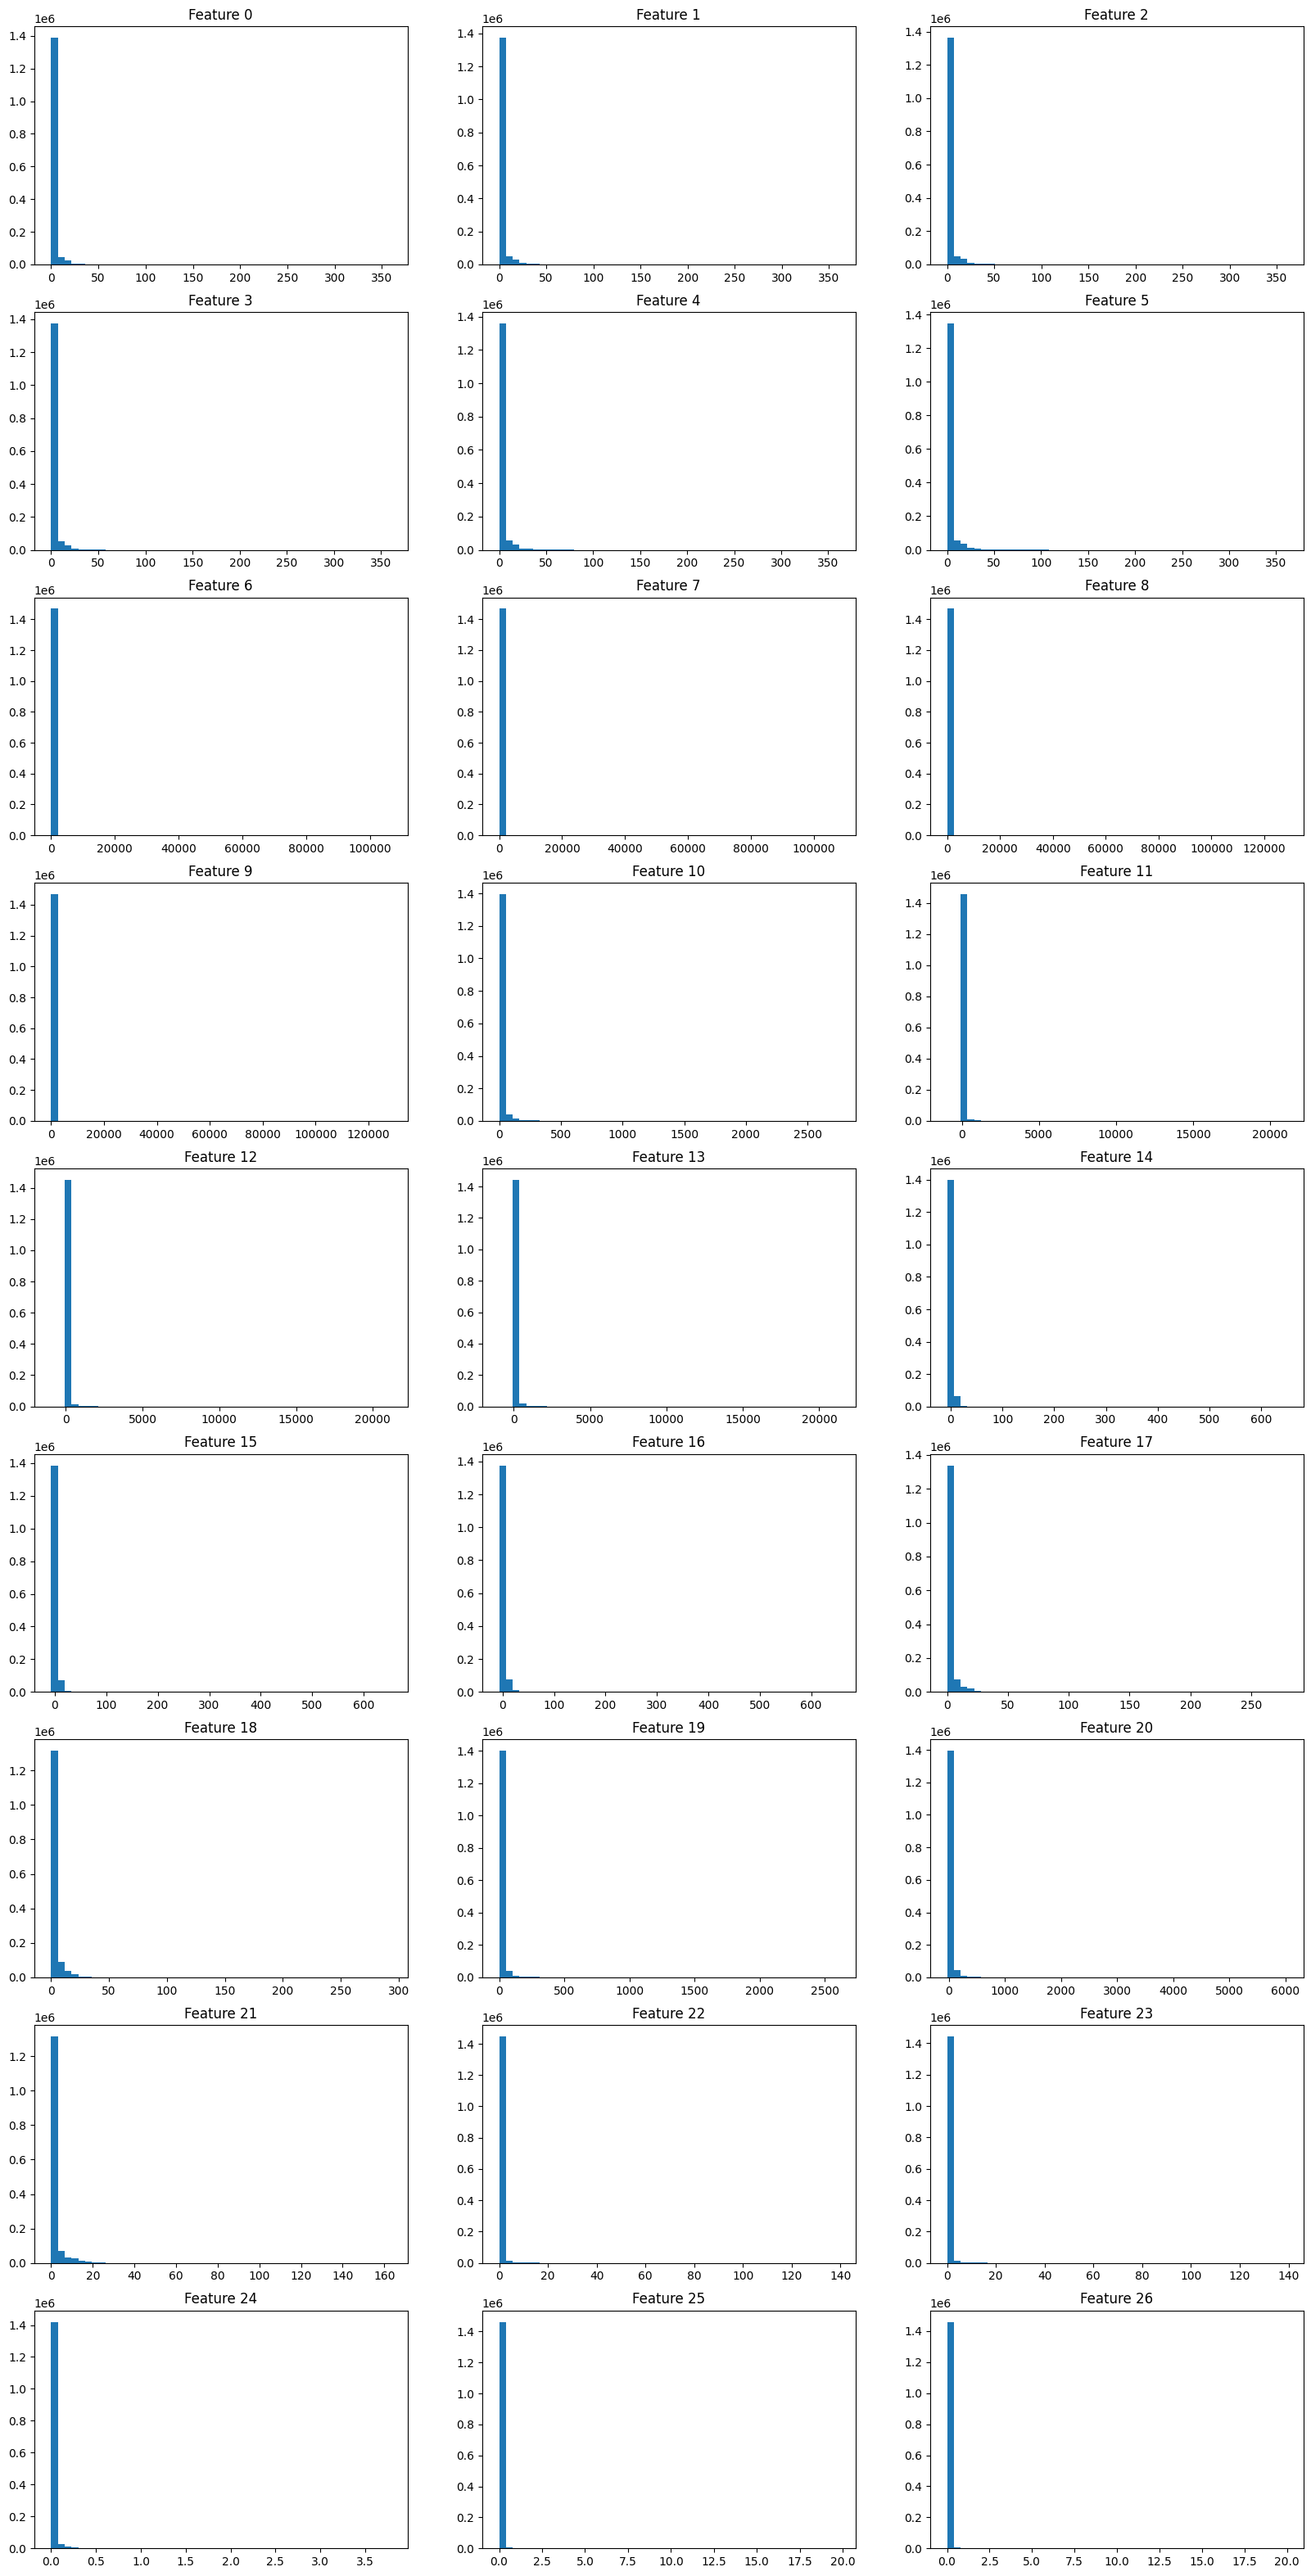

In [66]:
figure, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 40))

i = 0

for item in zip(axes.ravel(), features):
    ax, feature = item
    ax.hist(feature, bins=50)
    ax.set_title(f'Feature {i}')
    i += 1

We have to transform skew data to be more normal distributed. Shift the data to avoid negative values.

In [67]:
for i in range(len(features)):
    min_val = np.min(features[i])
    if min_val <= 0:
        features[i] = features[i] - min_val + 1

In [68]:
from scipy.stats import boxcox

features = boxcox(features, 0)

In [69]:
features

array([[0.        , 0.        , 0.        , ..., 2.30258509, 3.21887582,
        2.77258872],
       [0.        , 0.        , 0.        , ..., 2.77258872, 3.21887582,
        2.77258872],
       [0.        , 0.        , 0.        , ..., 2.94443898, 3.21887582,
        2.77258872],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.16343607,
        0.10877312],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16343607,
        0.10877312],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16343607,
        0.10877312]])

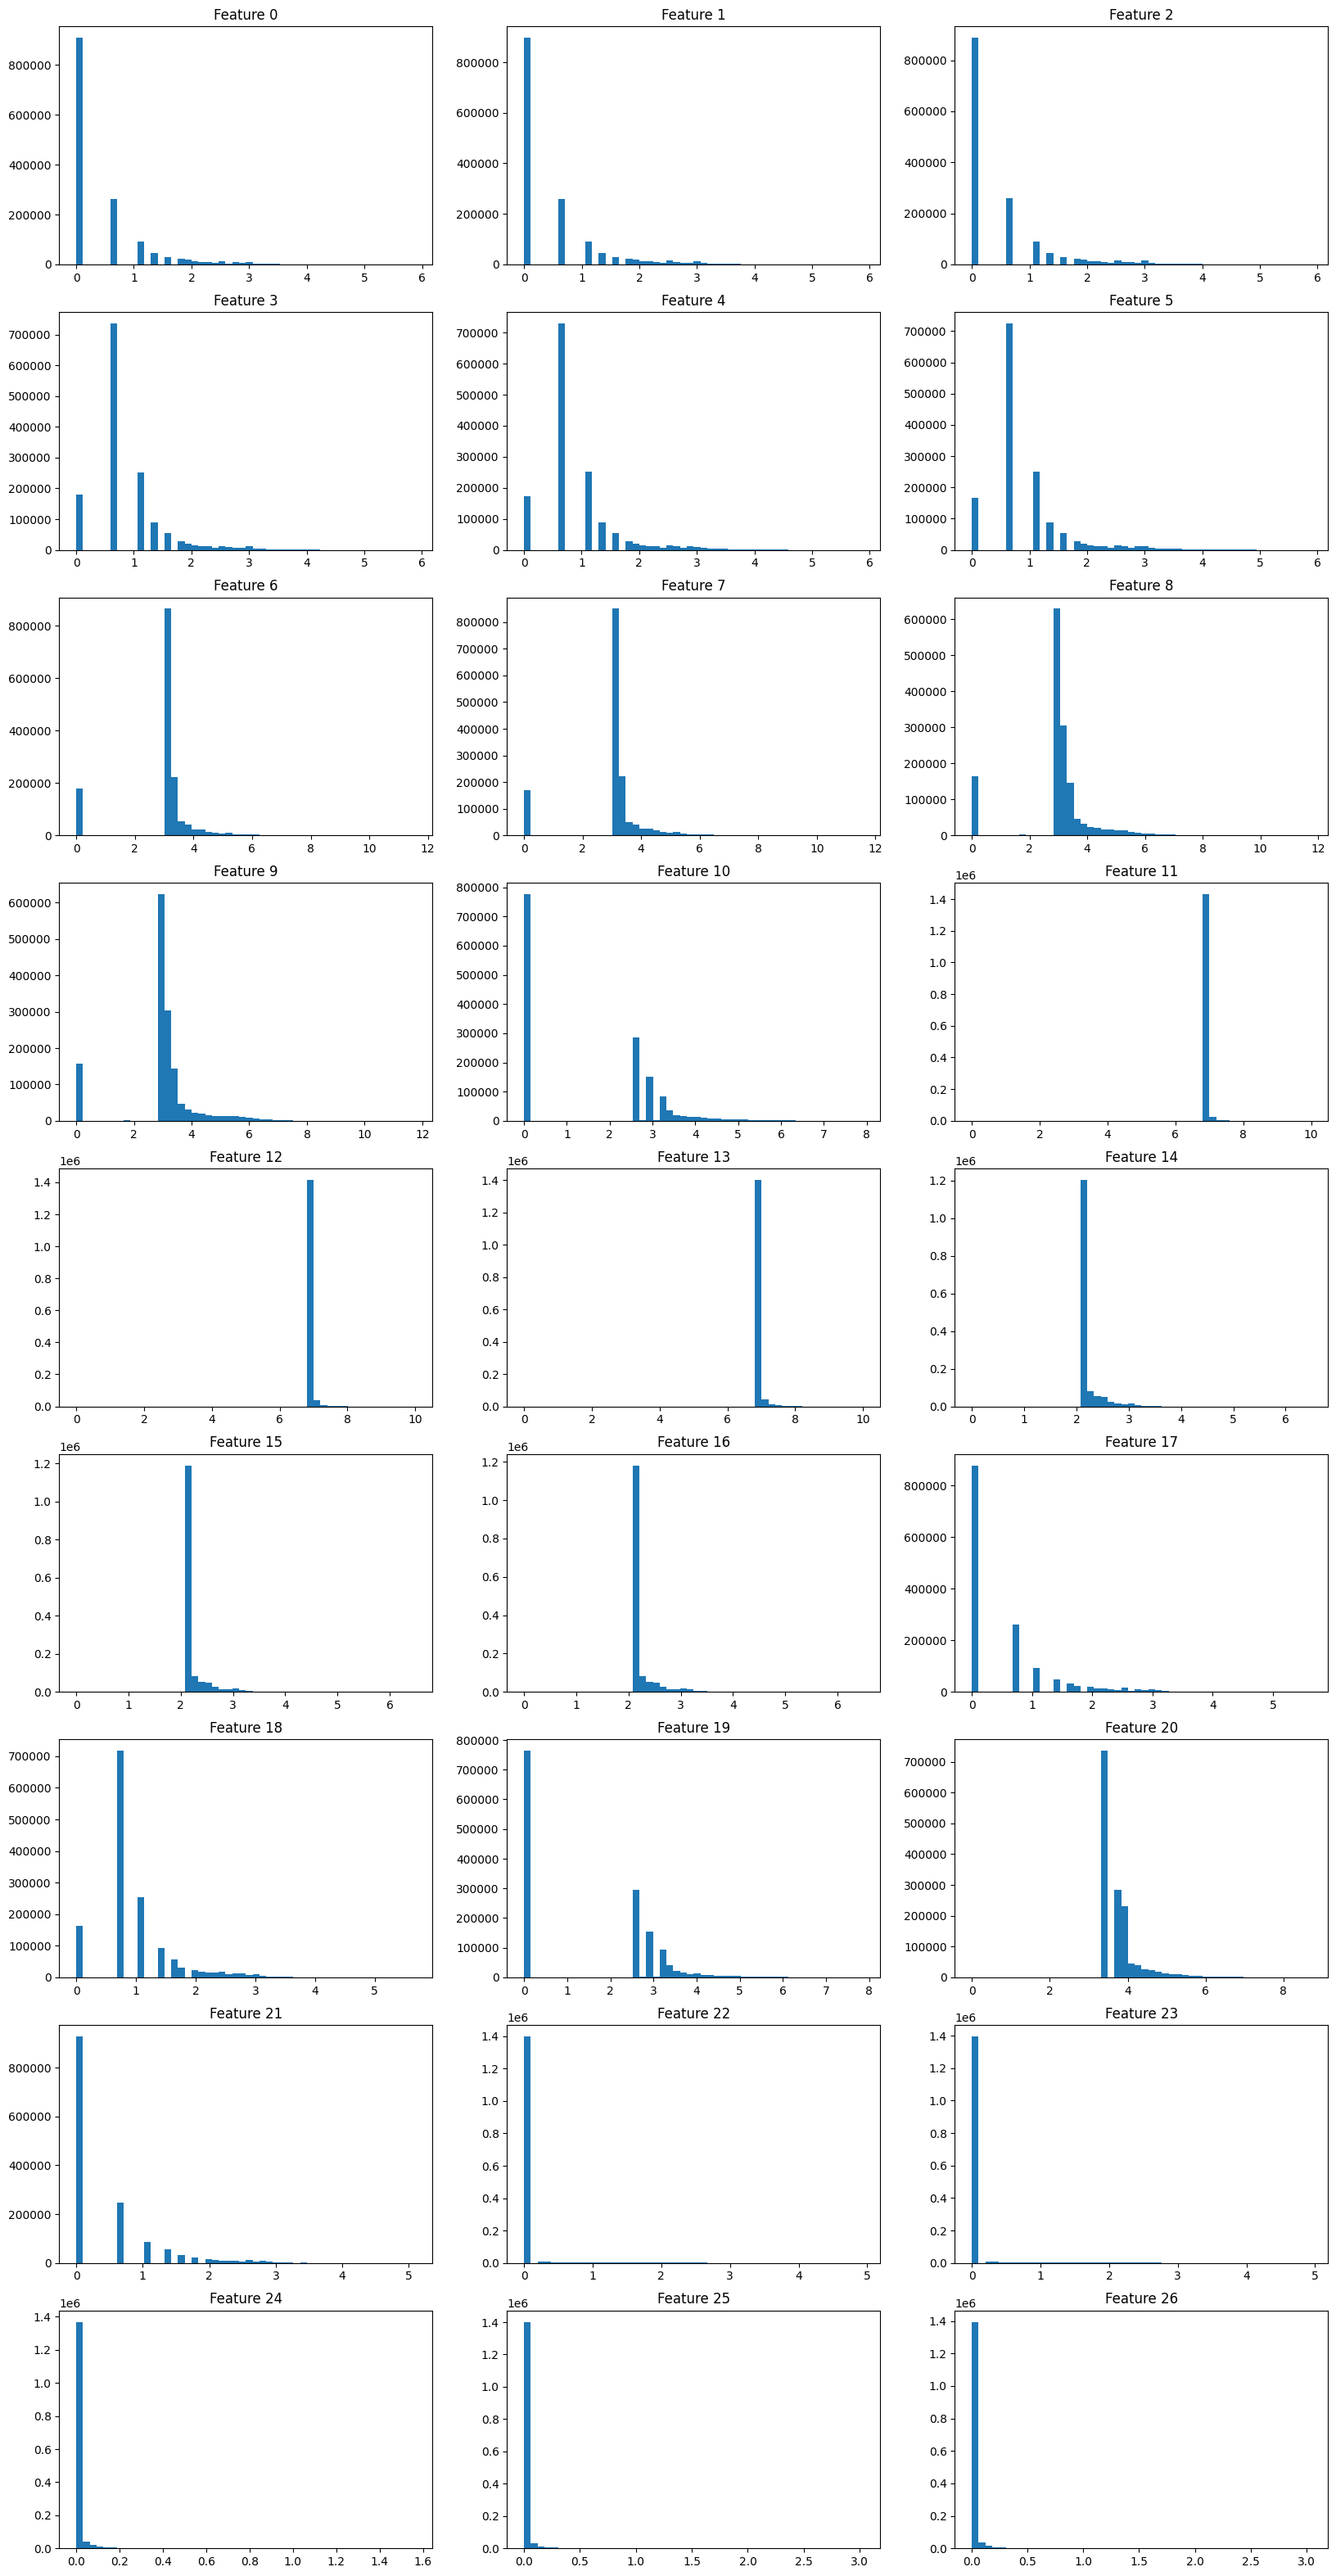

In [70]:
figure, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 40))

i = 0

for item in zip(axes.ravel(), features):
    ax, feature = item
    ax.hist(feature, bins=50)
    ax.set_title(f'Feature {i}')
    i += 1

## Detect outliers

In [71]:
features.shape

(27, 1467832)

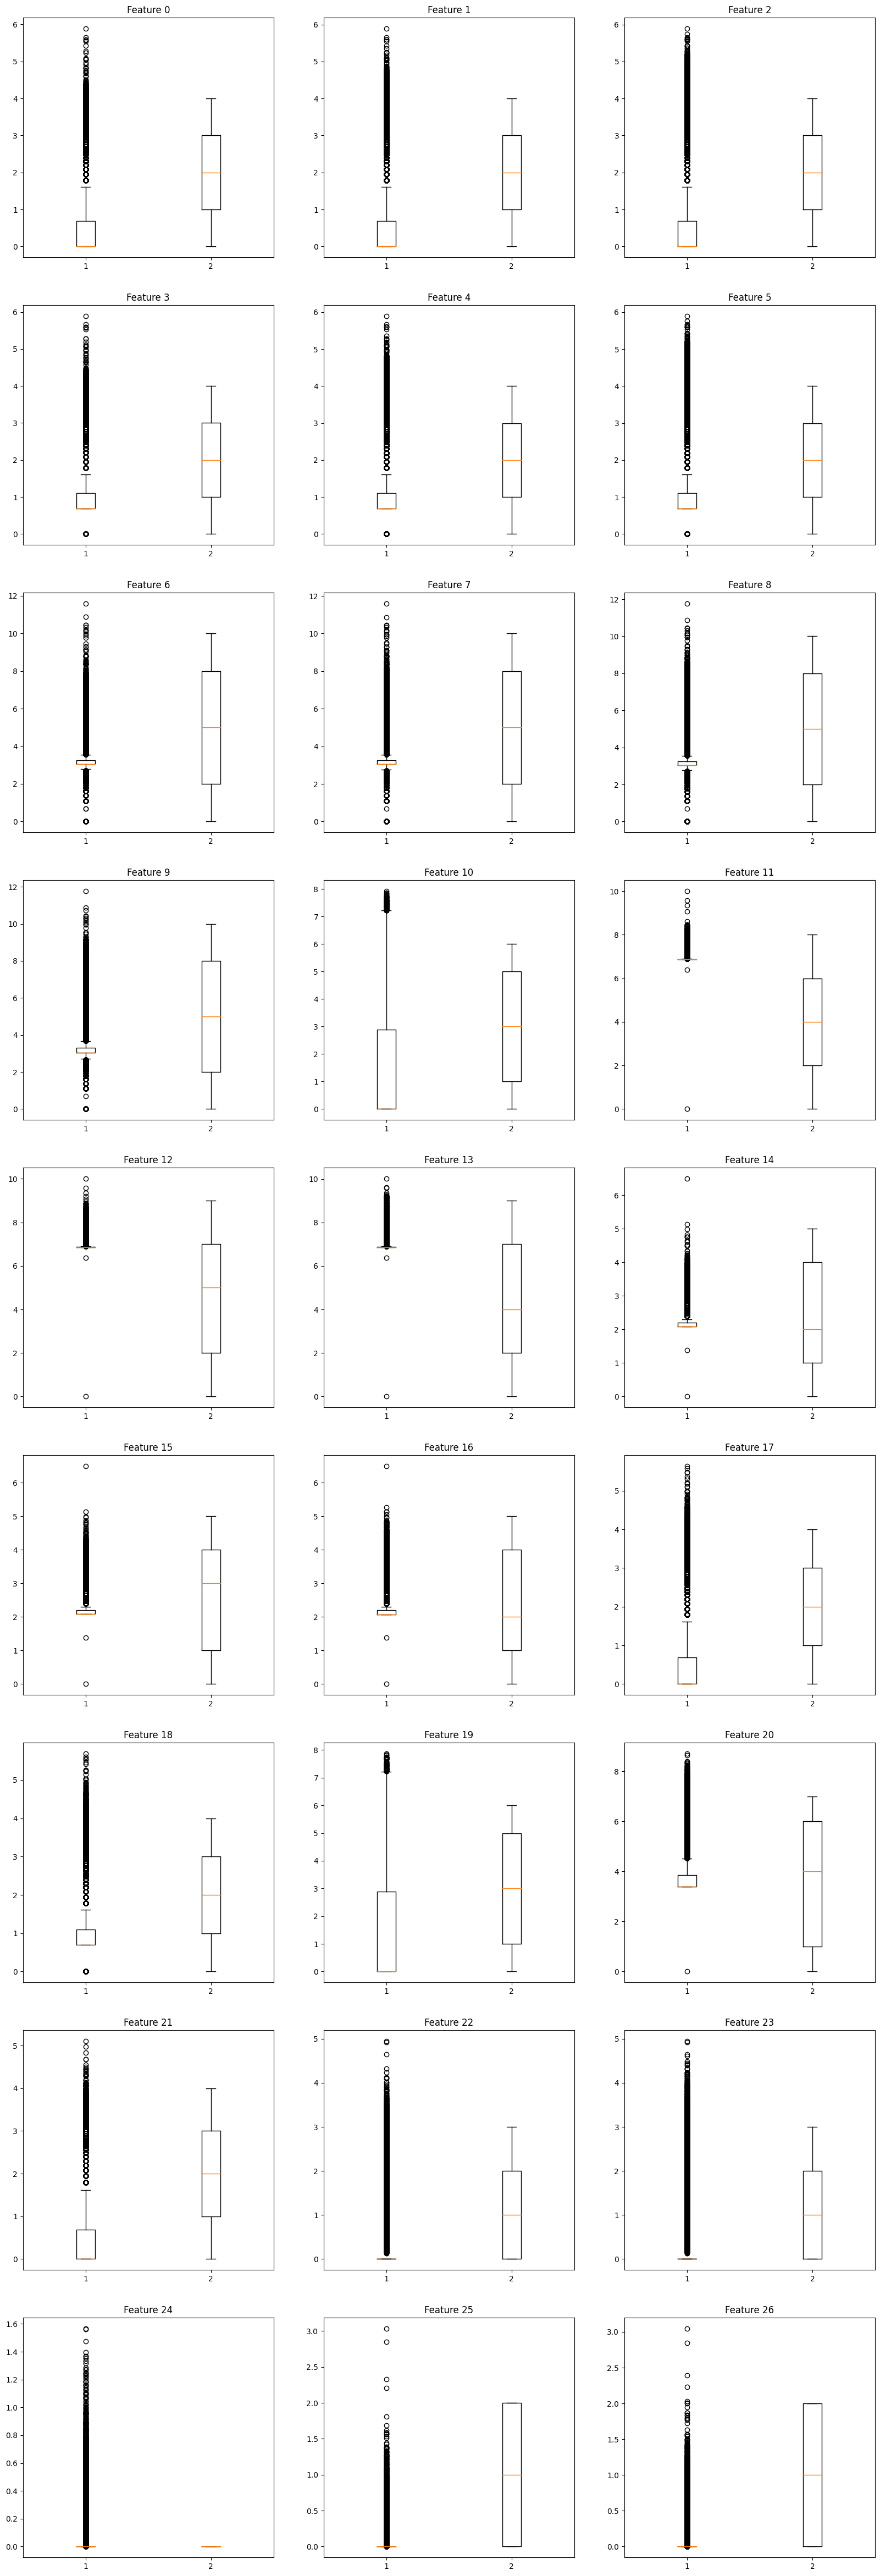

In [72]:
figure, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 60))

i = 0

for item in zip(axes.ravel(), features):
    hypo = np.random.randint(low=np.min(features[i]), high=np.max(features[i]), size=len(features[i]))
    ax, feature = item
    ax.boxplot([features[i], hypo])
    ax.set_title(f'Feature {i}')
    i += 1

## Scale features

In [73]:
features = features.T
features.shape

(1467832, 27)

In [74]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features = scaler.fit_transform(features)
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.32192809, 4.        , 4.24792751, ..., 0.        , 0.        ,
        0.        ],
       [4.64385619, 4.64385619, 4.64385619, ..., 0.16343607, 0.16343607,
        0.16343607],
       [4.        , 4.        , 4.        , ..., 0.10877312, 0.10877312,
        0.10877312]])

## Split dataset

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1174265, 27), (293567, 27), (1174265, 1), (293567, 1))

## Train model

We use RMSE as our primary metric since this metric is on the same scale as the unit being predicted. RMSE is considered to be most useful when large errors are particularly undesirable.

In [84]:
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

model = XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist')
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric="rmse", early_stopping_rounds=30, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Learning curve

In [85]:
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

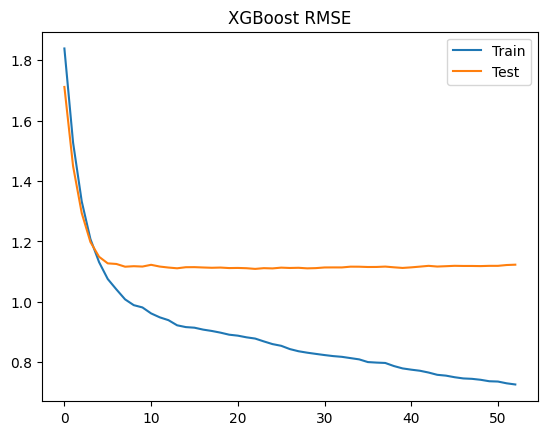

In [86]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.title('XGBoost RMSE')
plt.show()

## Metrics

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def get_metrics(y_train, y_train_prediced, y_test, y_test_prediced):
    r2_train = r2_score(y_train, y_train_prediced)
    r2_test = r2_score(y_test, y_test_prediced)
    mae_train = mean_absolute_error(y_train, y_train_prediced)
    mae_test = mean_absolute_error(y_test, y_test_prediced)
    mse_train = mean_squared_error(y_train, y_train_prediced)
    mse_test = mean_squared_error(y_test, y_test_prediced)
    rmse_train = mean_squared_error(y_train, y_train_prediced, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_prediced, squared=False)
    return r2_train, r2_test, mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test

In [88]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

R2_train, R2_test, mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test = get_metrics(y_train, y_train_predicted, y_test, y_test_predicted)
print(f'R2 train: {R2_train}')
print(f'R2 test: {R2_test}')
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')
print(f'MSE train: {mse_train}')
print(f'MSE test: {mse_test}')
print(f'RMSE train: {rmse_train}')
print(f'RMSE test: {rmse_test}')

R2 train: 0.8551461426703443
R2 test: 0.7307078846978312
MAE train: 0.09347268822277259
MAE test: 0.10061291782052537
MSE train: 0.7712989299704265
MSE test: 1.229931197231767
RMSE train: 0.8782362609061565
RMSE test: 1.1090226315237066


## Results visualization

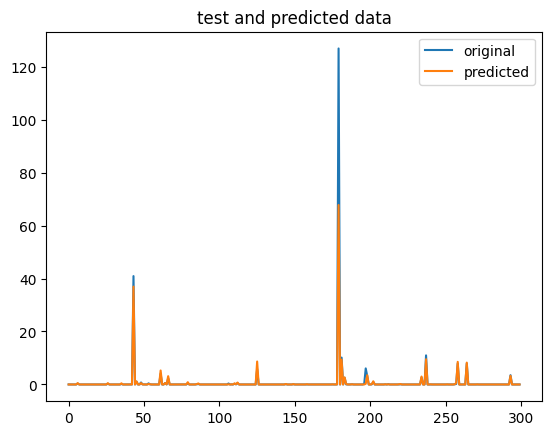

In [108]:
import matplotlib.pyplot as plt

x_ax = range(300)
plt.plot(x_ax, y_test[:300], label="original")
plt.plot(x_ax, y_test_predicted[:300], label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

## Save model

In [126]:
import pickle
import os

ROOT_PATH = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath('__file__')), os.pardir))

pickle.dump(model, open(ROOT_PATH + '\model\model.pkl', "wb"))